In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
loan = pd.read_csv('loan/loan.csv', parse_dates = ['issue_d'])

C:\Users\sxl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Number of loan transactions in different states

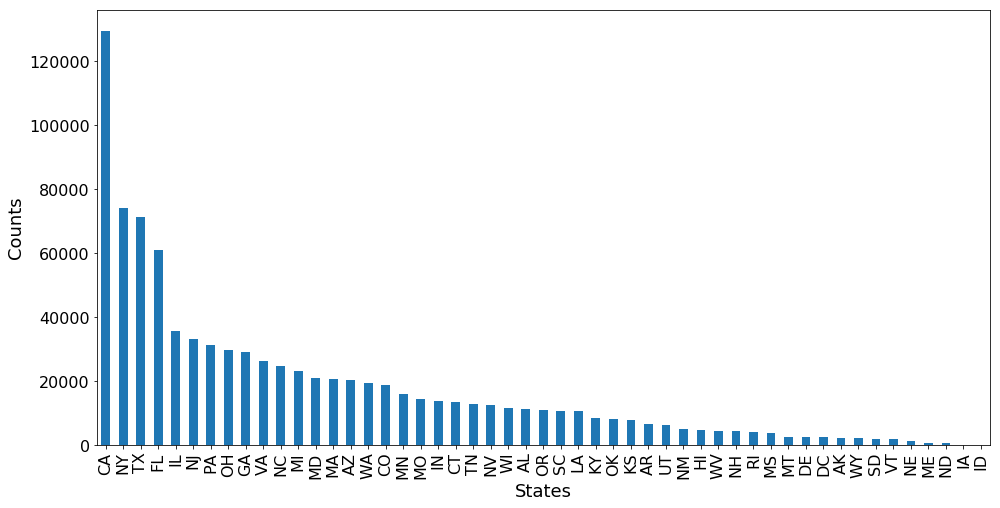

In [61]:
#Look at state distribution
state_count = loan.addr_state.value_counts()
state_count.plot(kind = 'bar', figsize = [16, 8], fontsize = 16)
plt.xlabel('States', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)

# Loan status distribution

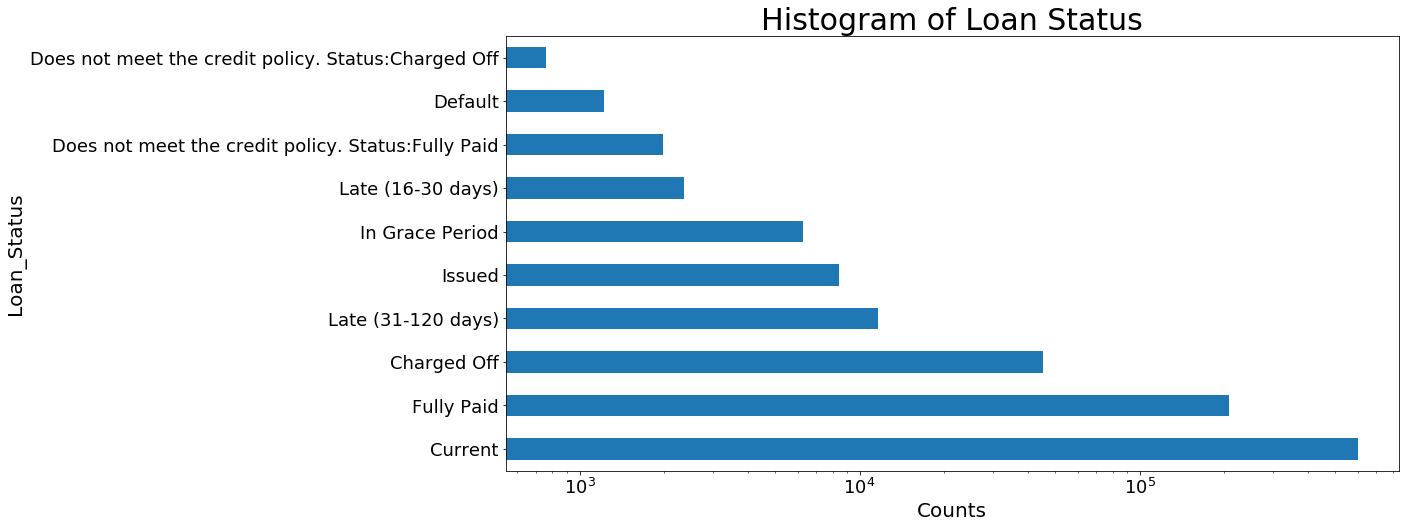

In [43]:
loan_status = loan.loan_status.value_counts()
loan_status.plot(kind = 'barh', figsize = [16, 8], logx = True, fontsize = 18)
plt.xlabel('Counts', fontsize = 20)
plt.ylabel('Loan_Status', fontsize = 20)
plt.title('Histogram of Loan Status', fontsize = 30)

# Total loan amount vs time

In [ ]:
# Look at the trend of loan amount with time
loan['issue_year'] = [x.year for x in loan['issue_d']]
loan_year = loan.groupby(['issue_year'])['loan_amnt'].sum()

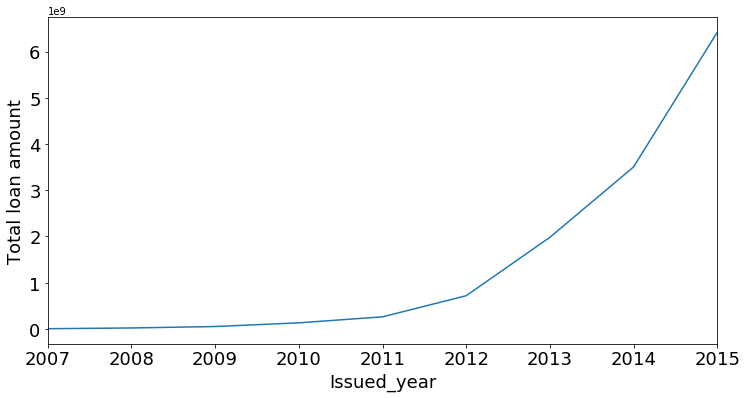

In [75]:
loan_year.plot(kind = 'line', figsize = [12, 6], fontsize = 18)
plt.ylabel('Total loan amount', fontsize = 18)
plt.xlabel('Issued_year', fontsize = 18)
plt.savefig('loan_year', format = 'png')

# Number of charged-off loans vs states

In [54]:
#charge_off 
loan_chargeoff = loan[loan['loan_status'] == 'Charged Off']
chargeoff_state =  loan_chargeoff.addr_state.value_counts()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,issue_year
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
12,1064687,1298717,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
14,1069057,1303503,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011


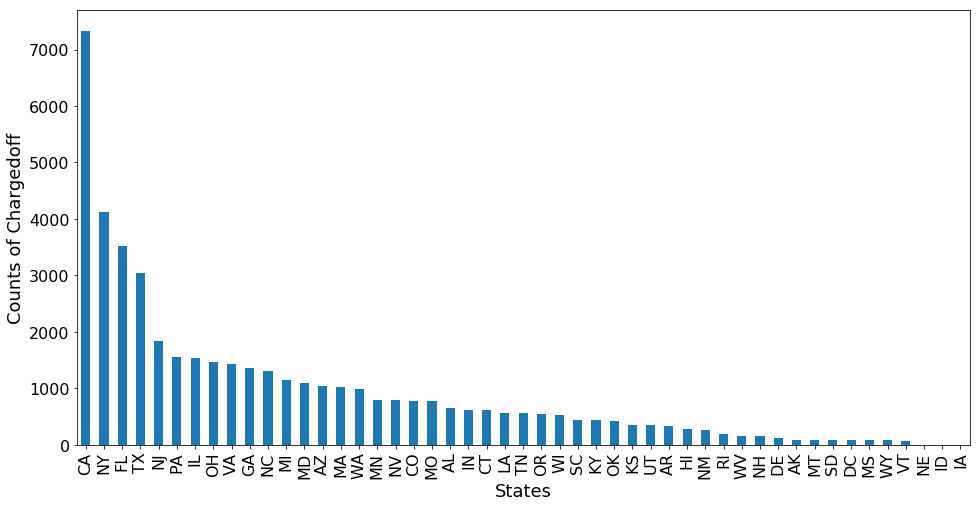

In [60]:
chargeoff_state.plot(kind = 'bar', figsize = [16, 8], fontsize = 16)
plt.ylabel('Counts of Chargedoff', fontsize = 18)
plt.xlabel('States', fontsize = 18)

# Charged-off rate vs states

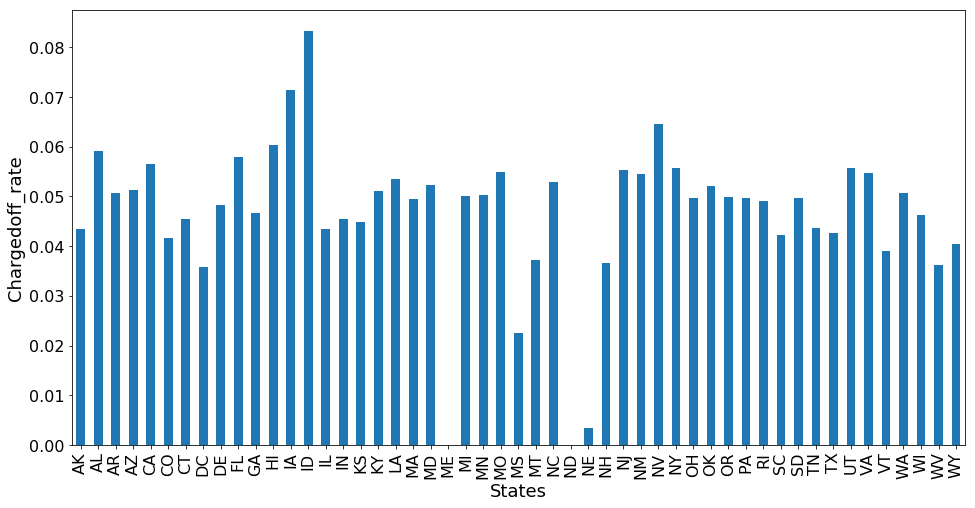

In [76]:
ratio_chargeoff = chargeoff_state / state_count
ratio_chargeoff.plot(kind = 'bar', figsize = [16, 8], fontsize = 16)
plt.xlabel('States', fontsize = 18)
plt.ylabel('Chargedoff_rate', fontsize =18)
plt.savefig('Chargeoff_state', format = 'png')